In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
import utils

In [2]:
%matplotlib inline

In [3]:
partisan_words = ['democrat', 'republican', 'politic', 'party', 'agenda', 'debate', 'disagree', 'partisan', 
                  'gridlock', 'divide', 'veto']
snowden_words = ['privacy', 'security', 'surveill', 'terror']
high_level_words = ['foreign', 'economy', 'health', 'education', 'military', 'energy', 'growth', 'tax', 'nuclear', 
                    'poverty', 'international']
foreign_regions = open('../data/international_states_regions.txt', 'r').read().splitlines()
domestic_regions = open('../data/US_states.txt', 'r').read().splitlines()

In [4]:
suas = utils.load_json_as_dict(utils.with_elections_fname)

In [5]:
def enrich_with_set_frequency(suas, set_name, target_words):
    for sua in suas:
        if set_name not in sua:
            sua[set_name] = 0
        for w in nltk.word_tokenize(sua['text']):
            contains_any = np.any([w.lower().startswith(target) \
                for target in target_words])
            if contains_any:
                sua[set_name] += 1

In [6]:
enrich_with_set_frequency(suas, 'partisan_words', partisan_words)

In [7]:
enrich_with_set_frequency(suas, 'snowden_words', snowden_words)

In [8]:
enrich_with_set_frequency(suas, 'high_level_words', high_level_words)

In [9]:
enrich_with_set_frequency(suas, 'foreign_regions', foreign_regions)

In [10]:
enrich_with_set_frequency(suas, 'domestic_regions', domestic_regions)

In [11]:
utils.save_as_json(utils.with_word_sets_fname, suas)

In [37]:
df = pd.read_json(utils.with_word_sets_fname)

In [38]:
# drop jimmy carter written sua
df = df[df['year'] != 1981]

In [39]:
df.describe()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,domestic_regions,foreign_regions,high_level_words,partisan_words,snowden_words,year,year_first_inaugurated
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.0,45.000000,45.000000,45.000000,45.000000,45.000000
mean,10.101867,10.051507,8.953504,64.987313,12.868364,42.551077,4.482896,11.610963,55.066667,0.0,0.0,55.088889,12.822222,14.600000,1993.533333,1990.311111
std,1.596814,0.739724,1.302679,5.032371,1.449637,3.700215,0.828415,0.919169,8.037978,0.0,0.0,23.302187,9.703066,13.597125,13.930999,13.555982
min,6.402390,8.646700,5.742900,53.794800,9.749400,35.790422,2.968254,9.666667,46.000000,0.0,0.0,11.000000,2.000000,0.000000,1970.000000,1969.000000
25%,9.091603,9.524400,8.035300,61.495600,11.655600,40.328991,3.930052,10.905241,47.000000,0.0,0.0,36.000000,6.000000,4.000000,1982.000000,1981.000000
50%,10.108591,10.087600,8.816900,65.138000,12.663700,42.566603,4.464183,11.532762,54.000000,0.0,0.0,57.000000,12.000000,11.000000,1995.000000,1993.000000
75%,10.810922,10.641800,9.726000,68.105600,14.005000,45.465532,5.044843,12.419069,61.000000,0.0,0.0,71.000000,16.000000,18.000000,2005.000000,2001.000000
max,15.087636,11.398300,12.782400,76.676000,16.664000,54.388224,7.383333,13.653638,69.000000,0.0,0.0,93.000000,44.000000,56.000000,2016.000000,2009.000000


In [40]:
df.head()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,college,...,political_party,president,rating _points,snowden_words,state_elected_from,text,up_for_reelection,year,year_first_inaugurated,years_in_office
0,11.378778,9.3638,9.8578,65.9131,14.1680,44.520904,4.944162,12.201633,56,Whittier,...,Republican,Richard Nixon,477,2,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1970,1969,5
1,12.066605,9.8441,10.2855,64.0304,14.7090,45.677690,5.203125,12.593292,56,Whittier,...,Republican,Richard Nixon,477,0,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1971,1969,5
2,12.153763,10.0876,10.4572,62.3806,14.8062,46.613922,5.430233,12.722905,56,Whittier,...,Republican,Richard Nixon,477,1,New York,"Mr. Speaker, Mr. President, my colleagues in t...",True,1972,1969,5
3,15.087636,11.1211,12.7824,53.7948,16.6640,54.388224,7.383333,13.653638,56,Whittier,...,Republican,Richard Nixon,477,0,New York,To the Congress of the United States: The tra...,False,1973,1969,5
4,12.866631,9.6118,11.1695,61.4956,15.4677,48.004312,5.716418,12.917571,56,Whittier,...,Republican,Richard Nixon,477,8,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1974,1969,5


In [41]:
def plot_election_cycle(df, topic_set):
    sb.lmplot('year', topic_set, data=df, hue='political_party', palette="Set1", fit_reg=False)
    sb.lmplot('year', topic_set, data=df, hue='lame_duck', palette="Set1", fit_reg=False)
    sb.lmplot('year', topic_set, data=df, hue='up_for_reelection', palette="Set1", fit_reg=False)
    sb.lmplot('year', topic_set, data=df, hue='midterm_election_year', palette="Set1", fit_reg=False)
    sb.lmplot('year', topic_set, data=df, hue='election_year', palette="Set1", fit_reg=False)

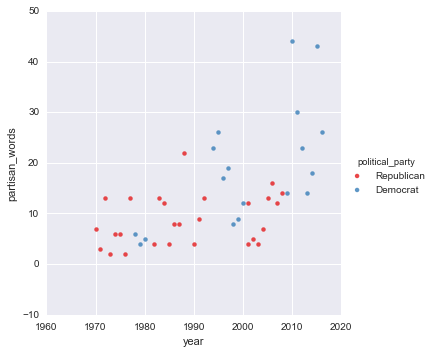

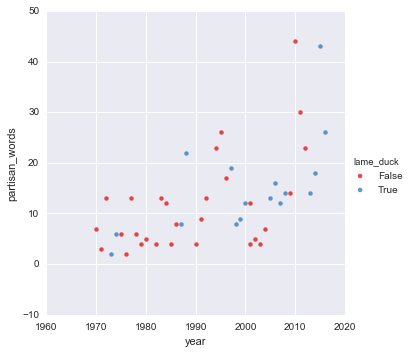

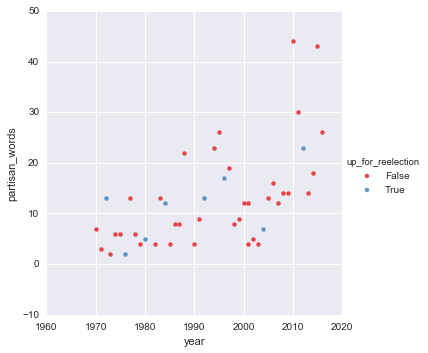

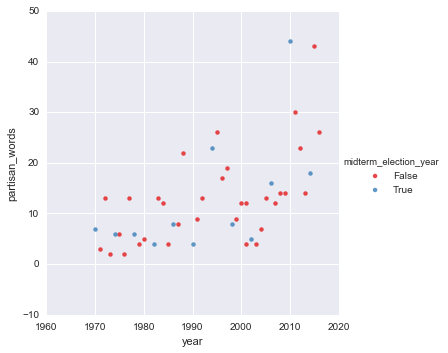

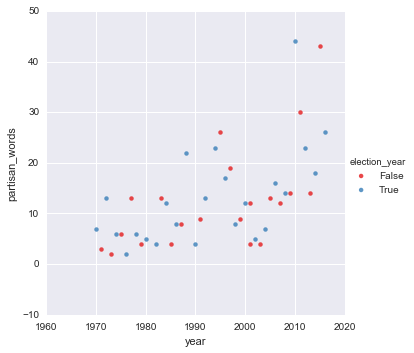

In [42]:
plot_election_cycle(df, 'partisan_words')

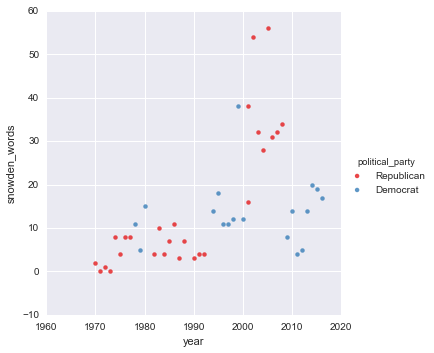

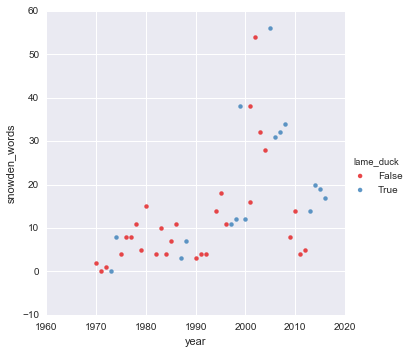

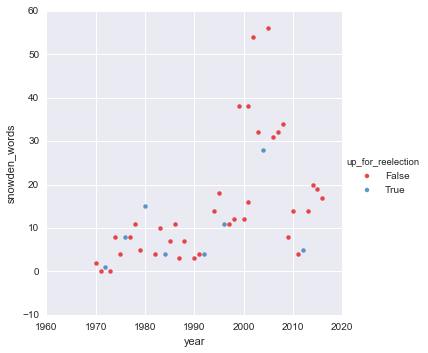

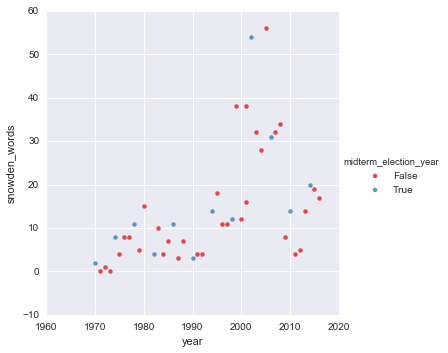

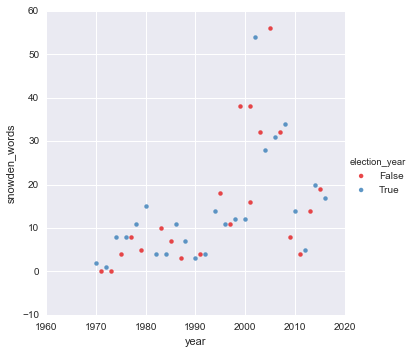

In [43]:
plot_election_cycle(df, 'snowden_words')

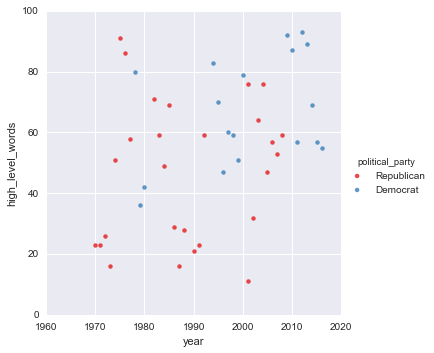

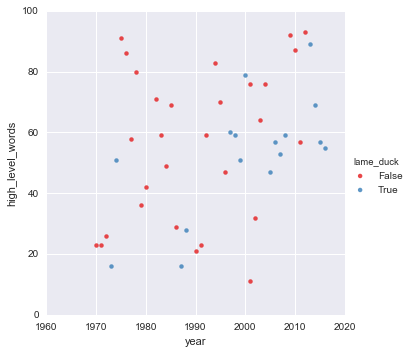

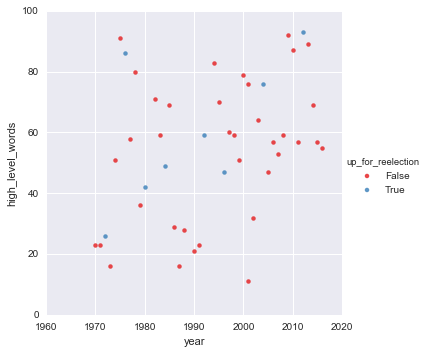

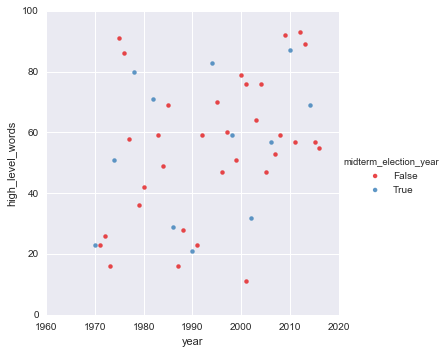

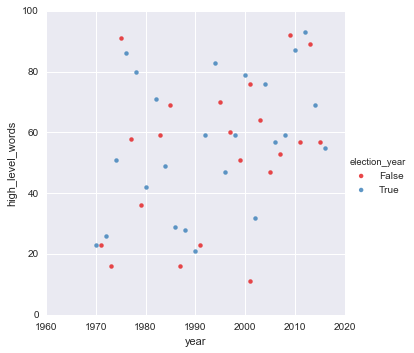

In [44]:
plot_election_cycle(df, 'high_level_words')

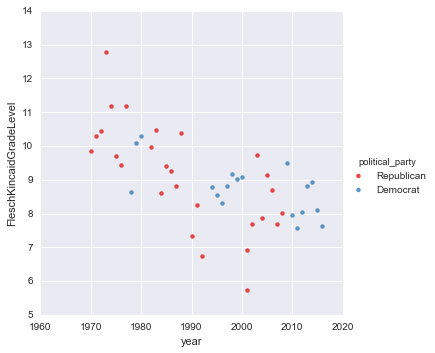

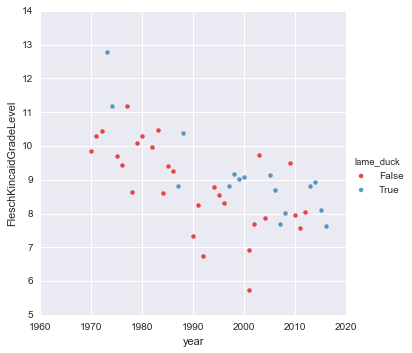

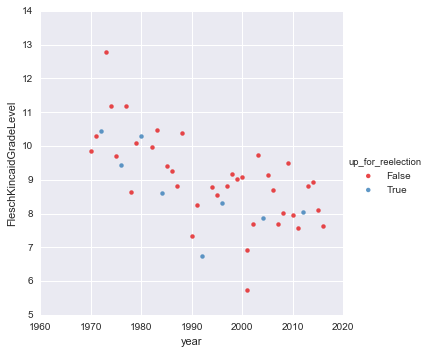

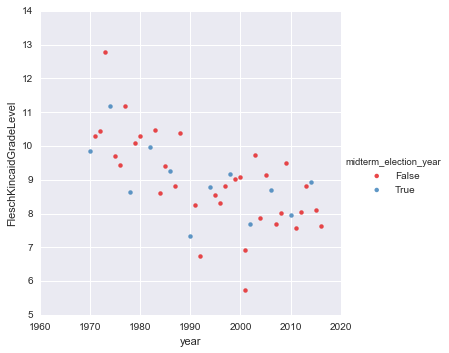

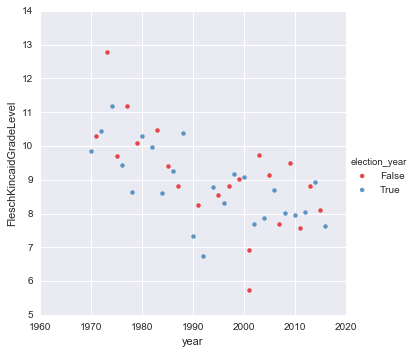

In [45]:
plot_election_cycle(df, 'FleschKincaidGradeLevel')

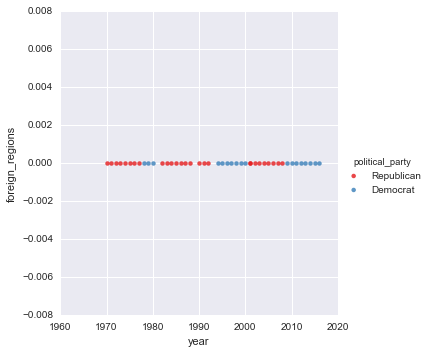

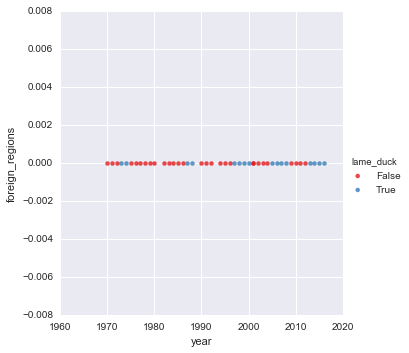

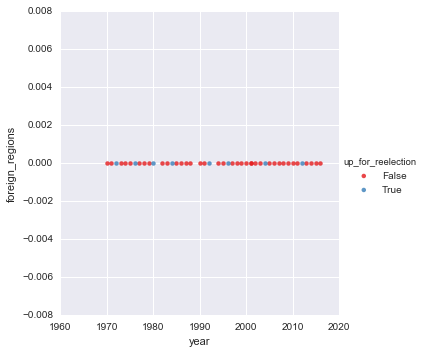

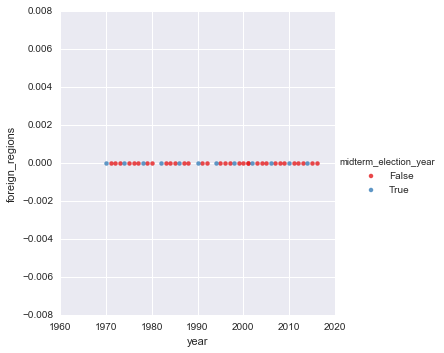

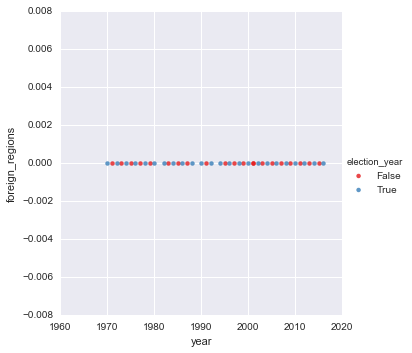

In [46]:
plot_election_cycle(df, 'foreign_regions')

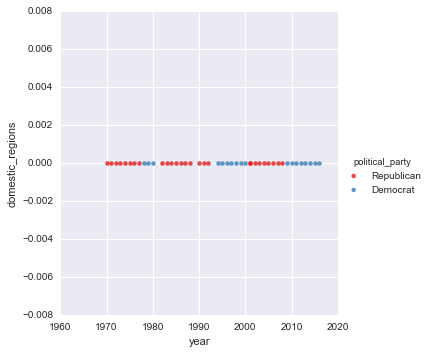

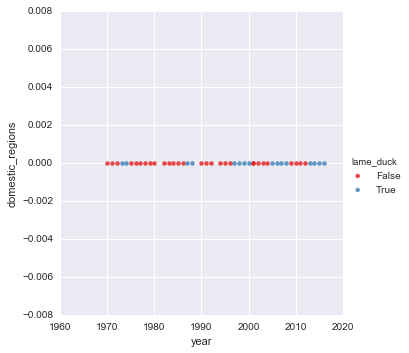

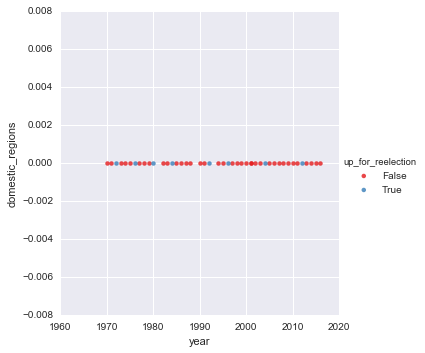

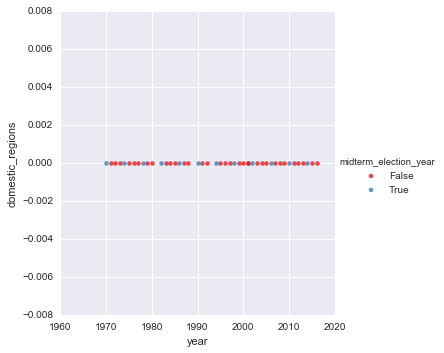

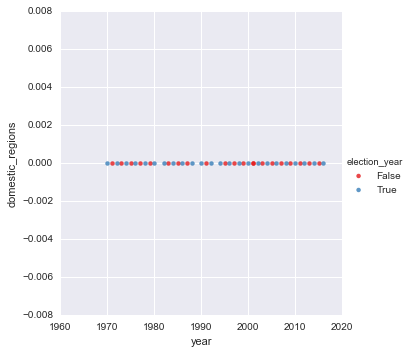

In [47]:
plot_election_cycle(df, 'domestic_regions')

In [48]:
zscore_cols = ['FleschKincaidGradeLevel',
        'partisan_words',
        'snowden_words',
        'high_level_words',
        'foreign_regions',
        'domestic_regions']

In [49]:
mean_df = df.groupby(by=['president']).agg({
        'FleschKincaidGradeLevel': 'mean',
        'partisan_words': 'mean',
        'snowden_words': 'mean',
        'high_level_words': 'mean',
        'foreign_regions': 'mean',
        'domestic_regions': 'mean'
}).rename(columns={'FleschKincaidGradeLevel': 'FleschKincaidGradeLevel_mean',
        'partisan_words': 'partisan_words_mean',
        'snowden_words': 'snowden_words_mean',
        'high_level_words': 'high_level_words_mean',
        'foreign_regions': 'foreign_regions_mean',
        'domestic_regions': 'domestic_regions_mean'})


std_df = df.groupby(by=['president']).agg({
        'FleschKincaidGradeLevel': 'std',
        'partisan_words': 'std',
        'snowden_words': 'std',
        'high_level_words': 'std',
        'foreign_regions': 'std',
        'domestic_regions': 'std'
}).rename(columns={'FleschKincaidGradeLevel': 'FleschKincaidGradeLevel_std',
        'partisan_words': 'partisan_words_std',
        'snowden_words': 'snowden_words_std',
        'high_level_words': 'high_level_words_std',
        'foreign_regions': 'foreign_regions_std',
        'domestic_regions': 'domestic_regions_std'})

In [50]:
mean_df.head()

,partisan_words_mean,snowden_words_mean,high_level_words_mean,FleschKincaidGradeLevel_mean,domestic_regions_mean,foreign_regions_mean
president,,,,,,
Barack Obama,26.500000,12.625000,74.875000,8.314525,0,0
George H.W. Bush,8.666667,3.666667,34.333333,7.448300,0,0
George W. Bush,9.666667,35.666667,52.777778,7.943878,0,0
Gerald R. Ford,7.000000,6.666667,78.333333,10.113433,0,0
Jimmy Carter,5.000000,10.333333,52.666667,9.668600,0,0


In [51]:
std_df.head()

,partisan_words_std,snowden_words_std,high_level_words_std,FleschKincaidGradeLevel_std,domestic_regions_std,foreign_regions_std
president,,,,,,
Barack Obama,11.880356,6.232117,17.058199,0.687545,0.0,0.0
George H.W. Bush,4.509250,0.577350,21.385353,0.750717,0.0,0.0
George W. Bush,4.663690,12.509996,20.831333,1.180163,0.0,0.0
Gerald R. Ford,5.567764,2.309401,17.785762,0.932896,0.0,0.0
Jimmy Carter,1.000000,5.033223,23.860707,0.900216,0.0,0.0


In [52]:
df_zscore = pd.merge(df, mean_df, left_on='president', right_index=True)
df_zscore = pd.merge(df_zscore, std_df, left_on='president', right_index=True)

In [53]:
df_zscore.head()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,college,...,high_level_words_mean,FleschKincaidGradeLevel_mean,domestic_regions_mean,foreign_regions_mean,partisan_words_std,snowden_words_std,high_level_words_std,FleschKincaidGradeLevel_std,domestic_regions_std,foreign_regions_std
0,11.378778,9.3638,9.8578,65.9131,14.1680,44.520904,4.944162,12.201633,56,Whittier,...,27.8,10.91048,0,0,4.32435,3.34664,13.479614,1.148409,0.0,0.0
1,12.066605,9.8441,10.2855,64.0304,14.7090,45.677690,5.203125,12.593292,56,Whittier,...,27.8,10.91048,0,0,4.32435,3.34664,13.479614,1.148409,0.0,0.0
2,12.153763,10.0876,10.4572,62.3806,14.8062,46.613922,5.430233,12.722905,56,Whittier,...,27.8,10.91048,0,0,4.32435,3.34664,13.479614,1.148409,0.0,0.0
3,15.087636,11.1211,12.7824,53.7948,16.6640,54.388224,7.383333,13.653638,56,Whittier,...,27.8,10.91048,0,0,4.32435,3.34664,13.479614,1.148409,0.0,0.0
4,12.866631,9.6118,11.1695,61.4956,15.4677,48.004312,5.716418,12.917571,56,Whittier,...,27.8,10.91048,0,0,4.32435,3.34664,13.479614,1.148409,0.0,0.0


In [54]:
df_zscore.columns

Index(['ARI', 'ColemanLiauIndex', 'FleschKincaidGradeLevel',
       'FleschReadingEase', 'GunningFogIndex', 'LIX', 'RIX', 'SMOGIndex',
       'age_at_inauguration', 'college', 'domestic_regions', 'election_year',
       'foreign_regions', 'high_level_words', 'lame_duck',
       'midterm_election_year', 'num_electoral_votes', 'occupation',
       'partisan_words', 'political_party', 'president', 'rating _points',
       'snowden_words', 'state_elected_from', 'text', 'up_for_reelection',
       'year', 'year_first_inaugurated', 'years_in_office',
       'partisan_words_mean', 'snowden_words_mean', 'high_level_words_mean',
       'FleschKincaidGradeLevel_mean', 'domestic_regions_mean',
       'foreign_regions_mean', 'partisan_words_std', 'snowden_words_std',
       'high_level_words_std', 'FleschKincaidGradeLevel_std',
       'domestic_regions_std', 'foreign_regions_std'],
      dtype='object')

In [56]:
for col in zscore_cols:
    col_zscore = col + '_zscore'
    col_mean = col + '_mean'
    col_std = col + '_std'
    df_zscore[col_zscore] = (df_zscore[col] - df_zscore[col_mean]) / df_zscore[col_std]

In [57]:
df_zscore.columns

Index(['ARI', 'ColemanLiauIndex', 'FleschKincaidGradeLevel',
       'FleschReadingEase', 'GunningFogIndex', 'LIX', 'RIX', 'SMOGIndex',
       'age_at_inauguration', 'college', 'domestic_regions', 'election_year',
       'foreign_regions', 'high_level_words', 'lame_duck',
       'midterm_election_year', 'num_electoral_votes', 'occupation',
       'partisan_words', 'political_party', 'president', 'rating _points',
       'snowden_words', 'state_elected_from', 'text', 'up_for_reelection',
       'year', 'year_first_inaugurated', 'years_in_office',
       'partisan_words_mean', 'snowden_words_mean', 'high_level_words_mean',
       'FleschKincaidGradeLevel_mean', 'domestic_regions_mean',
       'foreign_regions_mean', 'partisan_words_std', 'snowden_words_std',
       'high_level_words_std', 'FleschKincaidGradeLevel_std',
       'domestic_regions_std', 'foreign_regions_std',
       'FleschKincaidGradeLevel_zscore', 'partisan_words_zscore',
       'snowden_words_zscore', 'high_level_words_zsc

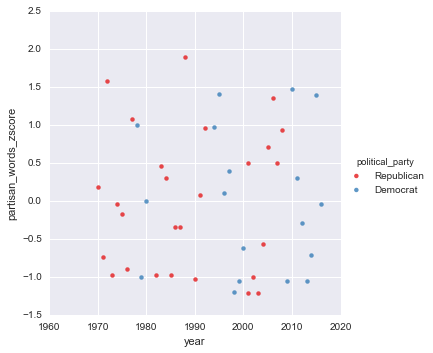

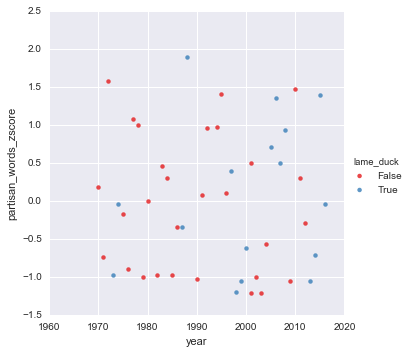

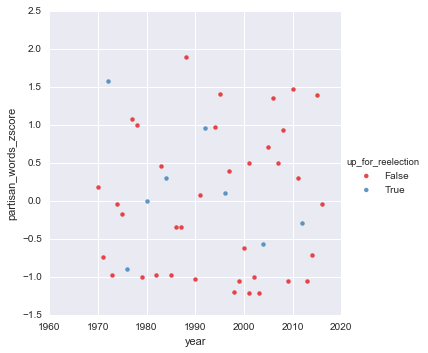

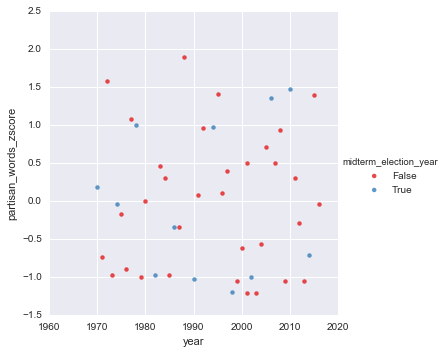

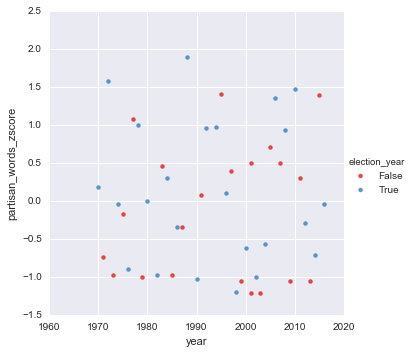

In [58]:
plot_election_cycle(df_zscore, 'partisan_words_zscore')

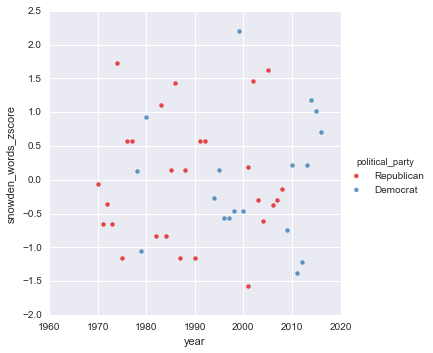

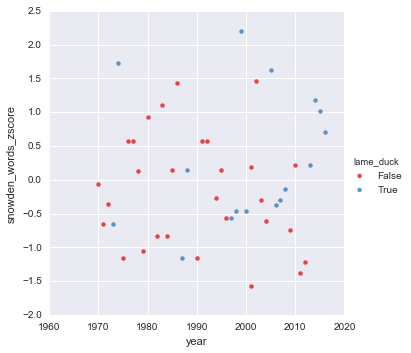

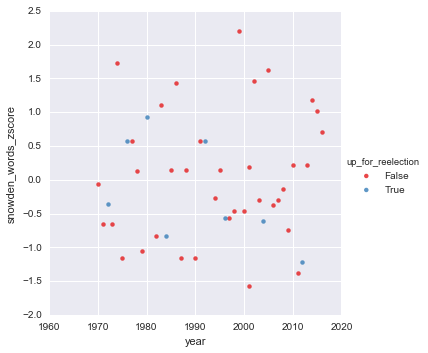

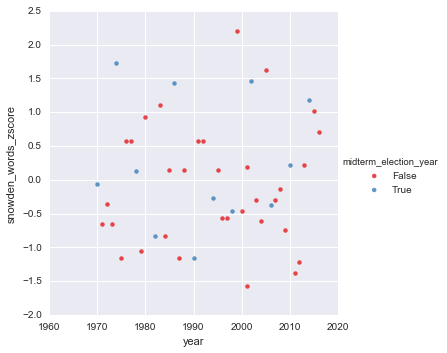

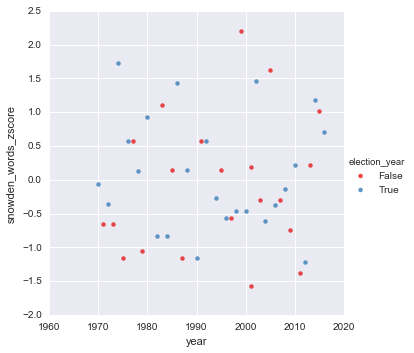

In [59]:
plot_election_cycle(df_zscore, 'snowden_words_zscore')

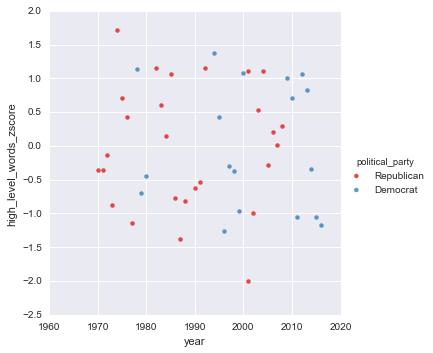

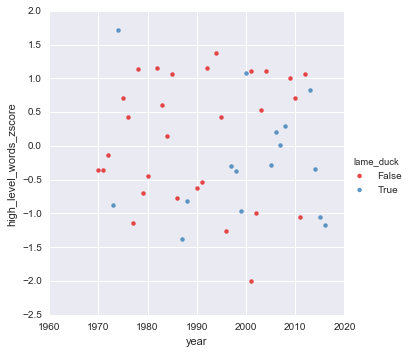

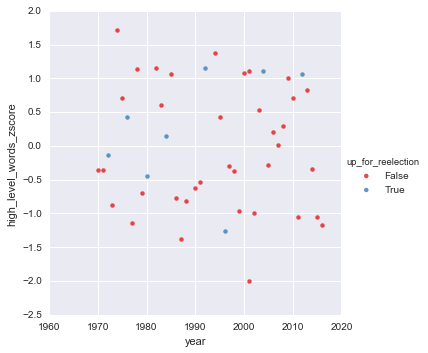

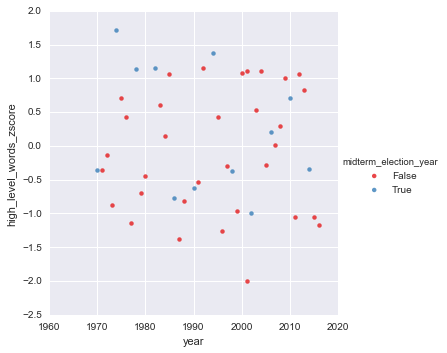

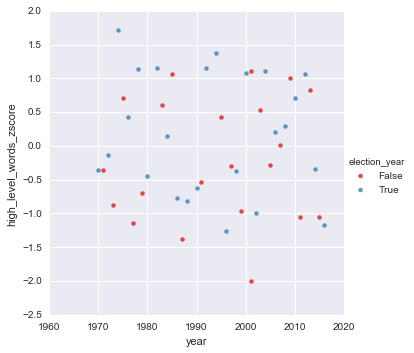

In [60]:
plot_election_cycle(df_zscore, 'high_level_words_zscore')

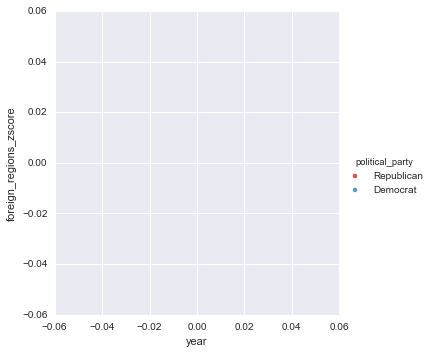

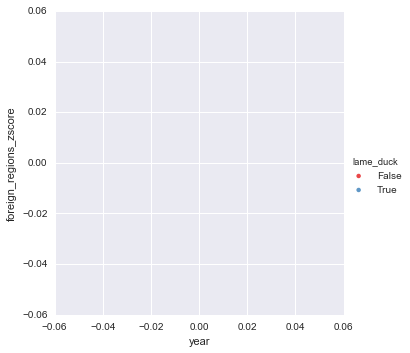

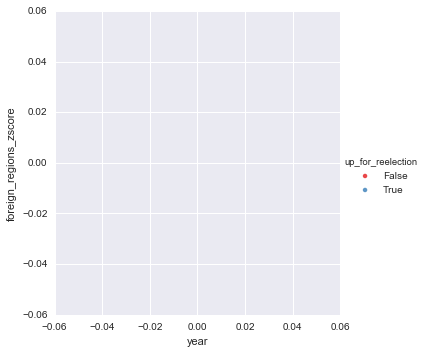

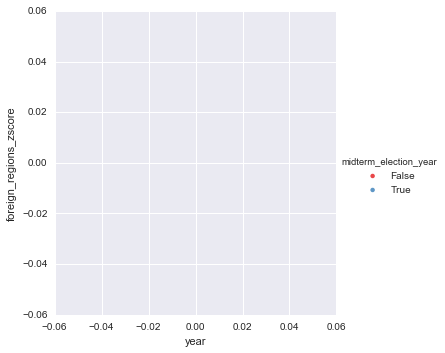

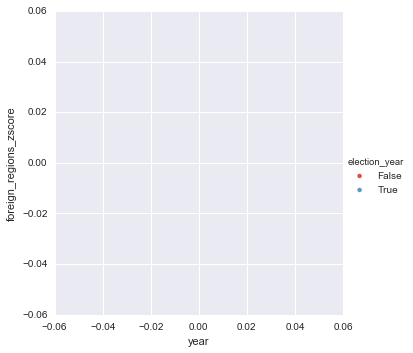

In [61]:
plot_election_cycle(df_zscore, 'foreign_regions_zscore')

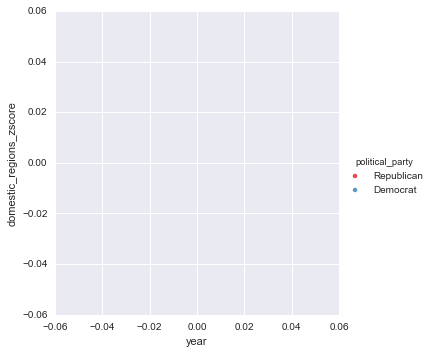

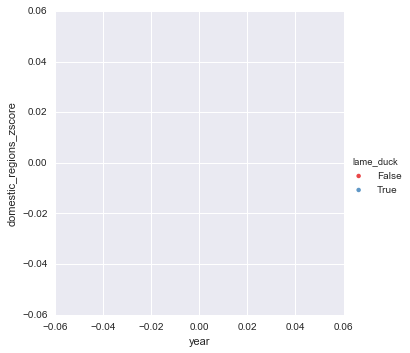

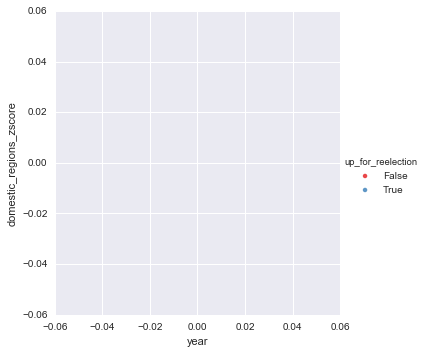

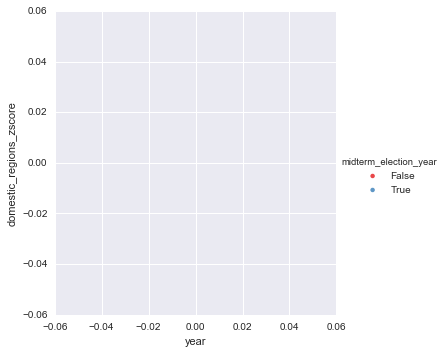

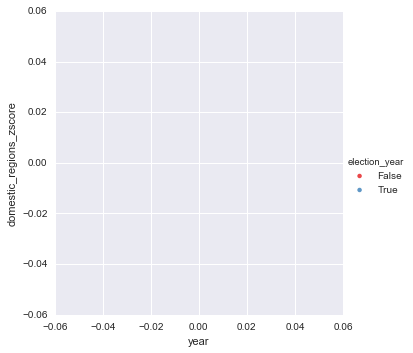

In [62]:
plot_election_cycle(df_zscore, 'domestic_regions_zscore')

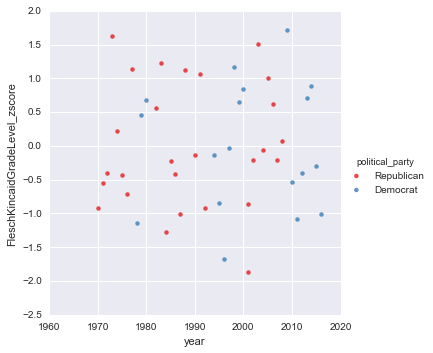

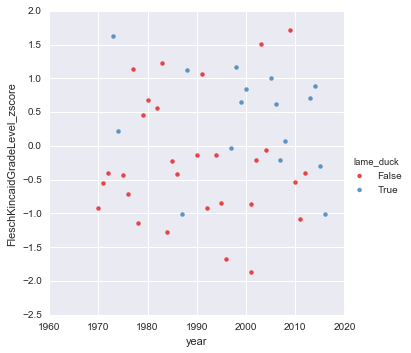

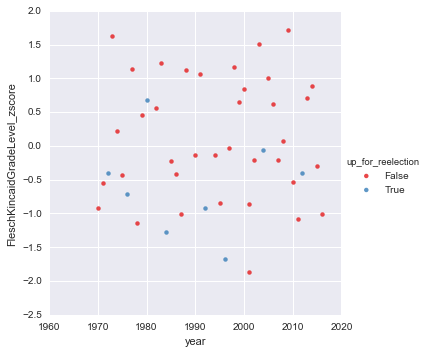

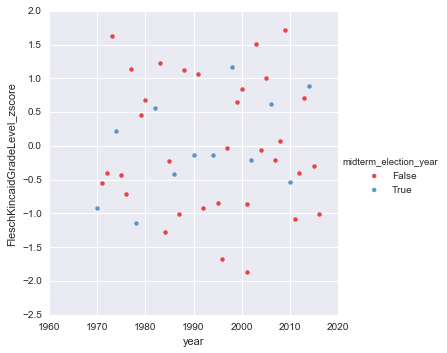

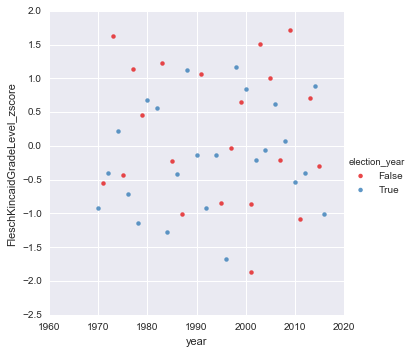

In [63]:
plot_election_cycle(df_zscore, 'FleschKincaidGradeLevel_zscore')